# Jonathan Halverson
# Thursday, January 10, 2018
# Part 1: Creating Reber and non-Reber grammars

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('halverson')

Our generating function is recursive:

In [2]:
def sub_branch(s_):
     while (np.random.choice([True, False])):
          s_ += 'T'
     s_ += 'V'
     if np.random.choice([True, False]):
          s_ += 'P'
          if np.random.choice([True, False]):
               s_ += 'SE'
          else:
               s_ += 'X'
               s_ = sub_branch(s_)
     else:
          s_ += 'VE'
     return s_

In [3]:
def make_reber_grammar():
     s = 'B'
     if np.random.choice([True, False]):
          s += 'T'
          while (np.random.choice([True, False])):
               s += 'S'
          s += 'X'
          if np.random.choice([True, False]):
               s += 'X'
               s = sub_branch(s)
          else:
               s += 'SE'
     else:
          s += 'P'
          s = sub_branch(s)
     return s

In [4]:
np.random.seed(424242)

In [5]:
N = 100000
correct_samples = [make_reber_grammar() for _ in range(N)]

In [6]:
correct_samples[:10]

['BPTTTVPSE',
 'BTSXXTVVE',
 'BTSSSXSE',
 'BPTVVE',
 'BPVPSE',
 'BPTVPXTVVE',
 'BTXSE',
 'BTSXXVPSE',
 'BTSXSE',
 'BTXSE']

In [7]:
lengths_correct_samples = [len(sample) for sample in correct_samples]
min(lengths_correct_samples), max(lengths_correct_samples)

(5, 37)

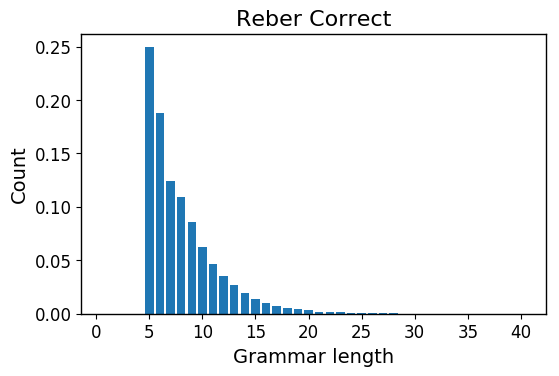

In [8]:
plt.hist(lengths_correct_samples, bins=np.linspace(0.5, 40.5, 41), normed=True, rwidth=0.8)
plt.xlabel('Grammar length')
plt.ylabel('Count')
plt.title('Reber Correct')

In [10]:
counts_correct_samples = np.bincount(lengths_correct_samples)
np.c_[np.arange(counts_correct_samples.size), counts_correct_samples]

array([[    0,     0],
       [    1,     0],
       [    2,     0],
       [    3,     0],
       [    4,     0],
       [    5, 24959],
       [    6, 18794],
       [    7, 12439],
       [    8, 10958],
       [    9,  8602],
       [   10,  6258],
       [   11,  4616],
       [   12,  3523],
       [   13,  2676],
       [   14,  1898],
       [   15,  1390],
       [   16,  1049],
       [   17,   740],
       [   18,   546],
       [   19,   413],
       [   20,   317],
       [   21,   202],
       [   22,   173],
       [   23,   131],
       [   24,    86],
       [   25,    64],
       [   26,    45],
       [   27,    30],
       [   28,    34],
       [   29,    18],
       [   30,     8],
       [   31,    12],
       [   32,     6],
       [   33,     5],
       [   34,     6],
       [   35,     1],
       [   36,     0],
       [   37,     1]])

In [11]:
length_proportions_correct = counts_correct_samples / float(N)
length_proportions_correct

array([  0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   2.49590000e-01,
         1.87940000e-01,   1.24390000e-01,   1.09580000e-01,
         8.60200000e-02,   6.25800000e-02,   4.61600000e-02,
         3.52300000e-02,   2.67600000e-02,   1.89800000e-02,
         1.39000000e-02,   1.04900000e-02,   7.40000000e-03,
         5.46000000e-03,   4.13000000e-03,   3.17000000e-03,
         2.02000000e-03,   1.73000000e-03,   1.31000000e-03,
         8.60000000e-04,   6.40000000e-04,   4.50000000e-04,
         3.00000000e-04,   3.40000000e-04,   1.80000000e-04,
         8.00000000e-05,   1.20000000e-04,   6.00000000e-05,
         5.00000000e-05,   6.00000000e-05,   1.00000000e-05,
         0.00000000e+00,   1.00000000e-05])

In [12]:
length_proportions_correct.sum()

0.99999999999999978

In [13]:
from collections import Counter

In [24]:
def show_character_proportions(words):
     joined = ''.join(words).replace('B', '').replace('E', '')
     characters = [c for c in joined]
     c = Counter(characters)
     char_proportions_correct = np.array(c.values()) / float(len(characters))

     for char, cnt, pro in zip(c.keys(), c.values(), char_proportions_correct):
          print char, cnt, pro
     print 'sum of proportions:', char_proportions_correct.sum()

In [25]:
show_character_proportions(correct_samples)

P 100092 0.16672024572
S 99997 0.166562007066
T 150034 0.249907138895
X 99821 0.166268849139
V 150415 0.250541759181
sum of proportions: 1.0


### Incorrect Reber samples

Now we know the frequencies that the letters should appear in. We will now construct incorrect Reber grammars using these same frequencies:

In [26]:
# could also not start with B and end with E
def make_wrong_grammar():
     length = np.random.choice(np.arange(38), size=1, p=length_proportions_correct)
     w = 'B'
     for _ in range(length - 2):
          w += np.random.choice(c.keys(), size=1, p=char_proportions_correct)[0]
     w += 'E'
     return w

Note that np.random.choice returns the following:

In [27]:
np.random.choice(c.keys(), size=1, p=char_proportions_correct)

NameError: name 'c' is not defined

In [ ]:
mega = set([make_reber_grammar() for _ in range(10000000)])
len(mega)

In [ ]:
def is_wrong(w):
     wrong_ending = (w[-2] == 'P' or w[-2] == 'T' or w[-2] == 'X')
     wrong_begin = (w[1] == 'S' or w[1] == 'V' or w[1] == 'X')
     wrong_path_1 = ('PE' in w or 'PP' in w)
     wrong_path_2 = ('SP' in w or 'SV' in w or 'ST' in w)
     wrong_path_3 = ('TP' in w or 'TE' in w)
     wrong_path_4 = ('VS' in w or 'VT' in w or 'VX' in w or 'VVV' in w)
     wrong_path_5 = ('XP' in w or 'XE' in w or 'XXX' in w)
     if (any([wrong_ending, wrong_begin, wrong_path_1, wrong_path_2,
              wrong_path_3, wrong_path_4, wrong_path_5])):
          return True
     else:
          return False

In [ ]:
incorrect_samples = filter(is_wrong, [make_wrong_grammar() for _ in range(100000)])
incorrect_samples[:10]

In [ ]:
b = np.linspace(0.5, 40.5, 41)
plt.hist(lengths, bins=b, normed=True, histtype='step', label='Correct')
plt.hist([len(w) for w in wrong_grammars], bins=b, normed=True, histtype='step', label='Incorrect')
plt.xlabel('Grammar length')
plt.ylabel('Count')
_ = plt.legend()

In [ ]:
len(incorrect_samples)

In [ ]:
len(set(incorrect_samples))

In [ ]:
any([w in mega for w in incorrect_samples])

In [ ]:
show_character_proportions(incorrect_samples)

### Create numerical encodings

In [ ]:
chars = ['B', 'E', 'P', 'S', 'T', 'V', 'X']
trans = dict([(u, v) for u, v in zip(chars, range(1, len(chars) + 1))])
trans

In [ ]:
w = incorrect_samples[10]

In [ ]:
padding = np.zeros(37, dtype=np.int)
encoding = []
for c in w:
     encoding.append(trans[c])
t = np.append(np.array(encoding), padding[:37 - len(w)])
w, t

In [ ]:
t.size

In [ ]:
max(lengths)

### zero padding and length_array_input

The plan is to feed in 